In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
#print(boston.target)

In [5]:
#print(boston.DESCR)

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [8]:
X.duplicated().sum()

0

In [10]:
import numpy as np
np.any(np.isnan(X))

False

# Spliitting and standardizing data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [12]:
from sklearn.preprocessing import StandardScaler
standardization= StandardScaler()
X_train = standardization.fit_transform(X_train)

# Gradient Descent code
In the sixth line i concatenated ones of size equal to number of rows in train data,
  W = b0+w1*x1+w2*x2+w3*x3....
         is same as
  W = b0*x0+w1*x1+w2*x2+w3*x3....  (where x0=1)
  so i added a feature at the end of train data with all ones which is x0. and W[-1:0] (which is last term of weight vector is my b0 )

In [27]:
import numpy as np
def GD(X_train,Y_train,alpha=0.001,num_of_iter=100,fit_intercept=False,penalty = 'l2',
       lamb=0.05,change_alpha=False,tol=0.001):
    num_of_col = X_train.shape[1]
    num_of_rows = X_train.shape[0]
    if (fit_intercept==True):
        W = np.random.normal(loc=0.1,scale=0.001,size=num_of_col+1)
        x = np.ones((num_of_rows,1))
        X_train = np.concatenate((X_train,x),axis=1)
    else:
         W = np.random.normal(size=X.shape[1])
    
    #W = W/(sum(W**2)**0.5)    
    W_hat = W
    W_new = W
    for i in range(1,num_of_iter,1):
        W_old = W_new
        #print (W_old)
        error = Y_train - np.dot(W_old,X_train.T)
        gradient = -(2/num_of_rows)*np.dot(X_train.T,error)
        regularization = 0
        if (penalty == 'l2'):
            regularization = 2*W_old
        elif (penalty == 'l1') :
            regularization = 1
        W_new = W_old - alpha*(gradient+lamb * regularization)
        #print (W_new)
        W_hat = W_new
        if (change_alpha==True):
            alpha=alpha/2
        k = W_new - W_old
        k =abs (k)       
        #print (k)
        if (sum(k)/len(k)==tol):
            #print (alpha)
            #print (i)
            W_hat = W_old
            break
     
    return (W_hat)

    

In [28]:
W_hat = GD(X_train,Y_train,penalty='l2',alpha = 0.05,num_of_iter=5000,lamb=0.01,fit_intercept=True,change_alpha=False)

In [29]:
W_hat

array([-1.26681059,  0.807998  , -0.25736564,  0.20527258, -1.38856047,
        2.8148151 , -0.34586958, -2.67124956,  2.578236  , -1.91130961,
       -2.10081408,  1.0380248 , -3.28815899, 22.31402786])

In [30]:
col = X_train.shape[1]
predictions = np.dot(standardization.transform(X_test),W_hat[0:-1])+W_hat[-1:]

In [31]:
predictions.shape

(167,)

In [32]:
error = predictions - Y_test

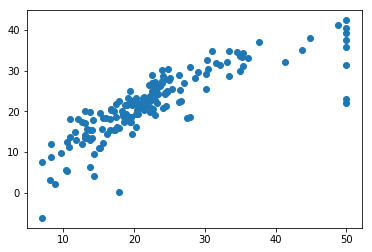

In [33]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)
plt.show()

# SGDRegressor

In [34]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(alpha=0.05,max_iter=5000,penalty='l2',learning_rate='constant',tol=0.001)
clf.fit(X_train,Y_train)

SGDRegressor(alpha=0.05, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=5000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [35]:
predictions1 = clf.predict(standardization.transform(X_test))

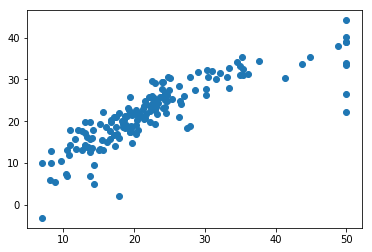

In [36]:
plt.scatter(Y_test,predictions1)
plt.show()

# Weights Comparison

In [37]:
print ('\tgradient descent\t\t\tSGD regressor')
print ('-'*100)
for i in range(13):
    print ('\t{0}\t\t\t\t{1}'.format(W_hat[i:i+1],clf.coef_[i:i+1]))
print ('\tintercept')
print ('\t{0}\t\t\t\t{1}'.format(W_hat[13:14],clf.intercept_))

	gradient descent			SGD regressor
----------------------------------------------------------------------------------------------------
	[-1.26681059]				[-0.95598885]
	[0.807998]				[0.91266346]
	[-0.25736564]				[-0.37134864]
	[0.20527258]				[1.05669396]
	[-1.38856047]				[-1.15997815]
	[2.8148151]				[2.37457691]
	[-0.34586958]				[-0.50317638]
	[-2.67124956]				[-2.09729828]
	[2.578236]				[1.59884316]
	[-1.91130961]				[-0.75138357]
	[-2.10081408]				[-1.71556694]
	[1.0380248]				[0.83954643]
	[-3.28815899]				[-3.23034314]
	intercept
	[22.31402786]				[22.34519262]


# Mean Square Error

In [38]:
#import sklearn.metrics.mean_squared_error as MSE
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(Y_test,predictions)
print ('mean squared error of gradient descent = {}'.format(mse))

mean squared error of gradient descent = 28.890517247630147


In [39]:
#import sklearn.metrics.mean_squared_error as MSE
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(Y_test,predictions1)
print ('mean squared error of SGD regressor = {}'.format(mse))

mean squared error of SGD regressor = 27.395627127847074
